MAE: 0.64
MSE: 0.68
RMSE: 0.82
R^2: 0.83


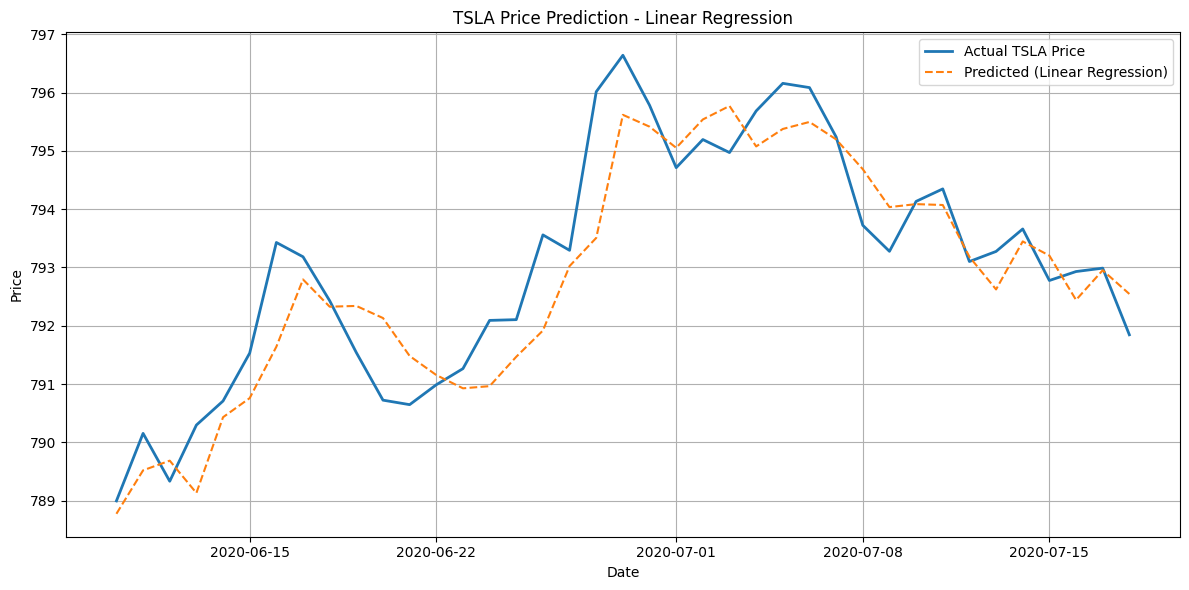

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=200)
prices = np.cumsum(np.random.randn(200)) + 800  # simulate TSLA stock prices

df = pd.DataFrame({'Date': dates, 'Close': prices})
df.set_index('Date', inplace=True)


df['Lag_1'] = df['Close'].shift(1)
df['Lag_2'] = df['Close'].shift(2)


df['SMA_5'] = df['Close'].rolling(window=5).mean()
df['SMA_10'] = df['Close'].rolling(window=10).mean()

df.dropna(inplace=True)

features = ['Lag_1', 'Lag_2', 'SMA_5', 'SMA_10']
target = 'Close'

train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

lr_model = LinearRegression()
lr_model.fit(train[features], train[target])
lr_preds = lr_model.predict(test[features])

mae = mean_absolute_error(test[target], lr_preds)
mse = mean_squared_error(test[target], lr_preds)
rmse = np.sqrt(mse)
r2 = r2_score(test[target], lr_preds)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(test.index, test[target], label='Actual TSLA Price', linewidth=2)
plt.plot(test.index, lr_preds, label='Predicted (Linear Regression)', linestyle='--')
plt.title('TSLA Price Prediction - Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
